In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Spotify Survey.csv to Spotify Survey.csv


In [ ]:
# change file name here
df = pd.read_csv('Spotify Survey.csv')
df.head(5)

,Time,UserID,Pre_Sptf_UserStatus,Pre_Features,OP_Sptf,OP_Exp,OP_Psnl:,FF_Value,FF_Engage,FF_MusicalPref,...,RI_NPS,RI_Pimpact,RI_ShareContent,DM_Age,DM_Gender,DM_Nationality,DM_SubType,DM_UseFreq,DM_ConstUsage,DM_Comments
0,2023/11/14 4:31:24 PM PST,n.hainam01@gmail.com,Yes,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",musical,5.0,3.0,2.0,2.0,4.0,...,4.0,2.0,2.0,18-22,Female,vietnam,Premium,Occasionally (1-3 times a week),2.0,no
1,2023/11/14 4:38:54 PM PST,yunyil@usc.edu,Yes,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Chill,4.0,5.0,4.0,3.0,4.0,...,4.0,4.0,1.0,23-29,Female,China,Premium,Very Frequently (daily),3.0,NaN
2,2023/11/14 4:45:39 PM PST,lxchu@usc.edu,Yes,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Inspired,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,23-29,Female,Vietnamese,Premium,Very Frequently (daily),3.0,Spotify is my bestie xx
3,2023/11/14 5:58:51 PM PST,lincolnn@usc.edu,Yes,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Great!,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,18-22,Male,Vietnamese,Premium,Very Frequently (daily),3.0,NaN
4,2023/11/14 6:31:38 PM PST,unggurar@usc.edu,Yes,Spotify Wrapped;Personalized Homepage Content;...,Happy,5.0,5.0,4.0,4.0,4.0,...,5.0,5.0,4.0,30-39,Female,Thai,Premium,Very Frequently (daily),4.0,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Time                 117 non-null    object 
 1   UserID               117 non-null    object 
 2   Pre_Sptf_UserStatus  117 non-null    object 
 3   Pre_Features         117 non-null    object 
 4   OP_Sptf              90 non-null     object 
 5   OP_Exp               100 non-null    float64
 6   OP_Psnl:             100 non-null    float64
 7   FF_Value             100 non-null    float64
 8   FF_Engage            100 non-null    float64
 9   FF_MusicalPref       100 non-null    float64
 10  FF_Dailylife         100 non-null    float64
 11  FF_Discoverability   100 non-null    float64
 12  FF_TimeSaving        100 non-null    float64
 13  FF_Trend             100 non-null    float64
 14  EC_Connect           100 non-null    float64
 15  EC_Ratings           100 non-null    flo

# **DF + Data Cleaning + Pre-processing**

In [ ]:
df = df.drop('Time', axis=1) # Dropping time bc its not important

In [ ]:
df['Pre_Sptf_UserStatus'] = df['Pre_Sptf_UserStatus'].astype(str)
print(df['Pre_Sptf_UserStatus'].unique())
print('Count of each unique responses:',df['Pre_Sptf_UserStatus'].value_counts())

['Yes' 'No']
Count of each unique responses: Yes    100
No      17
Name: Pre_Sptf_UserStatus, dtype: int64


In [ ]:
# Changing it into true/false
df['Pre_Sptf_UserStatus'] = df['Pre_Sptf_UserStatus'].map({'Yes': True, 'No': False})
df.head(3)

,UserID,Pre_Sptf_UserStatus,Pre_Features,OP_Sptf,OP_Exp,OP_Psnl:,FF_Value,FF_Engage,FF_MusicalPref,FF_Dailylife,...,RI_NPS,RI_Pimpact,RI_ShareContent,DM_Age,DM_Gender,DM_Nationality,DM_SubType,DM_UseFreq,DM_ConstUsage,DM_Comments
0,n.hainam01@gmail.com,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",musical,5.0,3.0,2.0,2.0,4.0,3.0,...,4.0,2.0,2.0,18-22,Female,vietnam,Premium,Occasionally (1-3 times a week),2.0,no
1,yunyil@usc.edu,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Chill,4.0,5.0,4.0,3.0,4.0,4.0,...,4.0,4.0,1.0,23-29,Female,China,Premium,Very Frequently (daily),3.0,NaN
2,lxchu@usc.edu,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Inspired,5.0,5.0,5.0,5.0,5.0,4.0,...,5.0,5.0,5.0,23-29,Female,Vietnamese,Premium,Very Frequently (daily),3.0,Spotify is my bestie xx


In [ ]:
df = df[df['Pre_Sptf_UserStatus'] != False] #Drop all rows that's not spotify user

#Verify if the numbers match
print('Count of each unique responses:',df['Pre_Sptf_UserStatus'].value_counts())

Count of each unique responses: True    100
Name: Pre_Sptf_UserStatus, dtype: int64


In [ ]:
# Convert 'UserID' to string
df['UserID'] = df['UserID'].astype(str)

# # Convert 'Pre_Features' to a list - This requires a custom function if it's a string of features
# # Assuming the features are separated by a comma
# df['Pre_Features'] = df['Pre_Features'].apply(lambda x: x.split(';'))

# Convert 'OP_Exp' to string
df['OP_Exp'] = df['OP_Exp'].astype(str)

# Convert Likert scale responses to integers
df['FF_Value'] = df['FF_Value'].astype(int)
df['FF_Engage'] = df['FF_Engage'].astype(int)
df['FF_MusicalPref'] = df['FF_MusicalPref'].astype(int)
df['FF_Dailylife'] = df['FF_Dailylife'].astype(int)
df['FF_Discoverability'] = df['FF_Discoverability'].astype(int)
df['FF_TimeSaving'] = df['FF_TimeSaving'].astype(int)
df['FF_Trend'] = df['FF_Trend'].astype(int)

In [ ]:
df = df.rename(columns={'OP_Psnl:': 'OP_Psnl'})

In [ ]:
df['OP_Psnl'] = df['OP_Psnl'].astype(float).astype(int)
df['OP_Exp'] = df['OP_Exp'].astype(float).astype(int)

df['OP_Exp'] = df['OP_Exp'].astype(int)

In [ ]:
ff_columns = [col for col in df.columns if col.startswith('FF_')]
df['FF_Sum'] = df[ff_columns].sum(axis=1)
df['FF_Score'] = ((df['FF_Sum'] / 35) * 5).round()

In [ ]:
# Convert 'EC_' prefixed Likert scale columns to integers

likert_columns_ec = [
    'EC_Connect', 'EC_Ratings', 'EC_O_Unders',
    'EC_O_Exp', 'EC_O_Exc', 'EC_O_Adm'
]
for column in likert_columns_ec:
    df[column] = df[column].astype(int)

In [ ]:
# Calcultating total EC scores
ec_columns = [col for col in df.columns if col.startswith('EC_')]
df['EC_Sum'] = df[ff_columns].sum(axis=1)
df['EC_Score'] = ((df['EC_Sum'] / 35) * 5).round()

In [ ]:
df.head(10)

,UserID,Pre_Sptf_UserStatus,Pre_Features,OP_Sptf,OP_Exp,OP_Psnl,FF_Value,FF_Engage,FF_MusicalPref,FF_Dailylife,...,DM_Gender,DM_Nationality,DM_SubType,DM_UseFreq,DM_ConstUsage,DM_Comments,FF_Sum,FF_Score,EC_Sum,EC_Score
0,n.hainam01@gmail.com,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",musical,5,3,2,2,4,3,...,Female,vietnam,Premium,Occasionally (1-3 times a week),2.0,no,20,3.0,20,3.0
1,yunyil@usc.edu,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Chill,4,5,4,3,4,4,...,Female,China,Premium,Very Frequently (daily),3.0,NaN,28,4.0,28,4.0
2,lxchu@usc.edu,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Inspired,5,5,5,5,5,4,...,Female,Vietnamese,Premium,Very Frequently (daily),3.0,Spotify is my bestie xx,34,5.0,34,5.0
3,lincolnn@usc.edu,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Great!,5,5,5,5,5,5,...,Male,Vietnamese,Premium,Very Frequently (daily),3.0,NaN,35,5.0,35,5.0
4,unggurar@usc.edu,True,Spotify Wrapped;Personalized Homepage Content;...,Happy,5,5,4,4,4,4,...,Female,Thai,Premium,Very Frequently (daily),4.0,NaN,26,4.0,26,4.0
6,kongchan@usc.edu,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",personalized,5,5,5,5,5,5,...,Female,Thai,Premium,Very Frequently (daily),4.0,NaN,34,5.0,34,5.0
7,myanvoh@gmail.com,True,Recommended Songs in Playlists;Personalized Ho...,Love it,4,4,4,4,5,4,...,Female,American,Premium,Very Frequently (daily),5.0,NaN,30,4.0,30,4.0
8,wanjutsa@usc.edu,True,"Made For You (Daily Mixes, Discover Weekly, et...",no feeling,4,4,5,4,4,5,...,Female,Taiwanese,Premium,Occasionally (1-3 times a week),2.0,NaN,28,4.0,28,4.0
9,xxwatermanxx@gmail.com,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Essential,5,5,5,5,5,5,...,Male,Vietnamese,Premium,Very Frequently (daily),3.0,NaN,35,5.0,35,5.0
11,ichiehhu@usc.edu,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Nice,5,5,5,4,5,5,...,Female,Taiwan,Premium,Frequently (4-6 times a week),3.0,Fight on,32,5.0,32,5.0


In [ ]:
df = df.drop('EC_Sum',axis=1)
df = df.drop('FF_Sum',axis=1)

In [ ]:
# Convert 'EC_' prefixed Likert scale columns to integers
likert_columns_ec = [
    'EC_Connect', 'EC_Ratings', 'EC_O_Unders',
    'EC_O_Exp', 'EC_O_Exc', 'EC_O_Adm'
]
for column in likert_columns_ec:
    df[column] = df[column].astype(int)

# Assuming 'EC_Score' needs to be calculated similarly to 'FF_Score'
# This part of the code would be used if you need to create the 'EC_Score' from other 'EC_' columns.
# However, if 'EC_Score' is already provided, you do not need to calculate it again.

# Convert 'RI_' prefixed columns to integers
ri_columns = ['RI_NPS', 'RI_Pimpact', 'RI_ShareContent']
for column in ri_columns:
    df[column] = df[column].astype(int)

# Convert demographic columns to their respective types
# df['DM_Age'] = df['DM_Age'].astype(int)  # Convert age to integer
df['DM_Gender'] = df['DM_Gender'].astype(str)  # Convert gender to string
df['DM_Nationality'] = df['DM_Nationality'].astype(str)  # Convert nationality to string

df['DM_SubType'] = df['DM_SubType'].astype(str)

# Assuming 'DM_UseFreq' and 'DM_ConsUsage' are also on a Likert scale, convert to integer
# df['DM_UseFreq'] = df['DM_UseFreq'].astype(int)
df['DM_ConstUsage'] = df['DM_ConstUsage'].astype(int)

# 'DM_Comments' should be left as a string, assuming it's open-ended feedback
# df['DM_Comments'] = df['DM_Comments'].astype(str)

# After all conversions, we can check the data types to ensure they are correct
df.dtypes


UserID                  object
Pre_Sptf_UserStatus       bool
Pre_Features            object
OP_Sptf                 object
OP_Exp                   int64
OP_Psnl                  int64
FF_Value                 int64
FF_Engage                int64
FF_MusicalPref           int64
FF_Dailylife             int64
FF_Discoverability       int64
FF_TimeSaving            int64
FF_Trend                 int64
EC_Connect               int64
EC_Ratings               int64
EC_Person               object
EC_O_Unders              int64
EC_O_Exp                 int64
EC_O_Exc                 int64
EC_O_Adm                 int64
RI_NPS                   int64
RI_Pimpact               int64
RI_ShareContent          int64
DM_Age                  object
DM_Gender               object
DM_Nationality          object
DM_SubType              object
DM_UseFreq              object
DM_ConstUsage            int64
DM_Comments             object
FF_Score               float64
EC_Score               float64
dtype: o

In [ ]:
# List of features based on the provided image
# The variable names are assigned as close as possible to the feature names
features_info = {
    'Pre_Spotify_Wrapped': 'Spotify Wrapped',
    'Pre_M4U': 'Made For You (Daily Mixes, Discovery, and more)',  # M4U as an abbreviation for "Made For You"
    'Pre_Recs_Song': 'Recommended Songs in Playlists',
    'Pre_P_HomePage': 'Personalized Homepage Content',
    'Pre_Collab_Play': 'Collaborative Playlists',
    'Pre_Release_Radar': 'Release Radar',
    'Pre_Radio_Stations': 'Spotify Radio Stations',
    'Pre_DJ_AI': 'Spotify DJ AI'
}

# Create a new column for each feature
for var_name, feature_name in features_info.items():
    df[var_name] = df['Pre_Features'].str.contains(feature_name, case=False, na=False)

# Now you can see each feature as a separate boolean column in the DataFrame
# with the assigned variable names
df.head()


<ipython-input-19-9520bca9d460>:16: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[var_name] = df['Pre_Features'].str.contains(feature_name, case=False, na=False)


,UserID,Pre_Sptf_UserStatus,Pre_Features,OP_Sptf,OP_Exp,OP_Psnl,FF_Value,FF_Engage,FF_MusicalPref,FF_Dailylife,...,FF_Score,EC_Score,Pre_Spotify_Wrapped,Pre_M4U,Pre_Recs_Song,Pre_P_HomePage,Pre_Collab_Play,Pre_Release_Radar,Pre_Radio_Stations,Pre_DJ_AI
0,n.hainam01@gmail.com,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",musical,5,3,2,2,4,3,...,3.0,3.0,True,False,False,False,True,False,False,False
1,yunyil@usc.edu,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Chill,4,5,4,3,4,4,...,4.0,4.0,True,False,True,True,False,False,False,False
2,lxchu@usc.edu,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Inspired,5,5,5,5,5,4,...,5.0,5.0,True,False,True,True,True,True,True,False
3,lincolnn@usc.edu,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Great!,5,5,5,5,5,5,...,5.0,5.0,True,False,True,True,True,False,False,True
4,unggurar@usc.edu,True,Spotify Wrapped;Personalized Homepage Content;...,Happy,5,5,4,4,4,4,...,4.0,4.0,True,False,False,True,False,True,False,False


In [ ]:
# Define the grouped features
grouped_features = ['Pre_Spotify_Wrapped', 'Pre_M4U', 'Pre_Recs_Song', 'Pre_P_HomePage']

# Calculate the point for grouped features (1 point if any of them is True)
# If none are True, we still assign 1 point to avoid a score of 0.
df['grouped_feature_point'] = df[grouped_features].any(axis=1).astype(int)
df['grouped_feature_point'] = df['grouped_feature_point'].replace(0, 1)

# Define the remaining features
remaining_features = ['Pre_Collab_Play', 'Pre_Release_Radar', 'Pre_Radio_Stations', 'Pre_DJ_AI']

# Calculate the awareness score by summing the remaining feature points and the grouped feature point
df['awareness_score'] = df[remaining_features].sum(axis=1) + df['grouped_feature_point']

# Ensure that 'awareness_score' is at least 1
df['awareness_score'] = df['awareness_score'].replace(0, 1)

# Display the updated 'awareness_score'
df['awareness_score']


0      2
1      1
2      4
3      3
4      2
      ..
111    3
112    3
113    1
115    1
116    5
Name: awareness_score, Length: 100, dtype: int64

In [ ]:
print('Count of each unique responses:',df['awareness_score'].value_counts())

Count of each unique responses: 1    38
2    36
4    11
3    10
5     5
Name: awareness_score, dtype: int64


In [ ]:
rows_with_zero_awareness = df[df['awareness_score'] == 0]
rows_with_zero_awareness

,UserID,Pre_Sptf_UserStatus,Pre_Features,OP_Sptf,OP_Exp,OP_Psnl,FF_Value,FF_Engage,FF_MusicalPref,FF_Dailylife,...,Pre_Spotify_Wrapped,Pre_M4U,Pre_Recs_Song,Pre_P_HomePage,Pre_Collab_Play,Pre_Release_Radar,Pre_Radio_Stations,Pre_DJ_AI,grouped_feature_point,awareness_score


In [ ]:
print('Count of each unique responses:',df['DM_Age'].value_counts())

Count of each unique responses: 23-29           69
18-22           15
30-39           14
40 and above     2
Name: DM_Age, dtype: int64


In [ ]:
# Replace 'Correct_Age_Column_Name' with the actual column name for age in your DataFrame
age_column = 'DM_Age'

# Define the conditions and corresponding codes
conditions = [
    df[age_column] == 'Under 18',
    df[age_column] == '18-22',
    df[age_column] == '23-29',
    df[age_column] == '30-39',
    df[age_column] == '40 and above'
]

# The codes that correspond to the above conditions
age_codes = [1, 2, 3, 4, 5]

# Using numpy's select method to assign codes based on the conditions
df['DM_Age_Code'] = np.select(conditions, age_codes)

# Display the new 'DM_Age_Code' column along with the correct age column to verify
df[[age_column, 'DM_Age_Code']]


,DM_Age,DM_Age_Code
0,18-22,2
1,23-29,3
2,23-29,3
3,18-22,2
4,30-39,4
...,...,...
111,23-29,3
112,23-29,3
113,30-39,4
115,23-29,3


In [ ]:
# Define the conditions and corresponding codes for 'DM_Gender'
gender_conditions = [
    df['DM_Gender'] == 'Male',
    df['DM_Gender'] == 'Female',
    df['DM_Gender'] == 'Non-binary/Third gender',
    df['DM_Gender'] == 'Prefer not to say'
]

# The codes that correspond to the above conditions
gender_codes = [1, 2, 3, 4]

# Using numpy's select method to assign codes based on the conditions
df['DM_Gender_Code'] = np.select(gender_conditions, gender_codes, default=np.nan)

# Display the new 'DM_Gender_Code' column along with 'DM_Gender' to verify
df[['DM_Gender', 'DM_Gender_Code']]

,DM_Gender,DM_Gender_Code
0,Female,2.0
1,Female,2.0
2,Female,2.0
3,Male,1.0
4,Female,2.0
...,...,...
111,Female,2.0
112,Male,1.0
113,Male,1.0
115,Female,2.0


In [ ]:
df.head(6)

,UserID,Pre_Sptf_UserStatus,Pre_Features,OP_Sptf,OP_Exp,OP_Psnl,FF_Value,FF_Engage,FF_MusicalPref,FF_Dailylife,...,Pre_Recs_Song,Pre_P_HomePage,Pre_Collab_Play,Pre_Release_Radar,Pre_Radio_Stations,Pre_DJ_AI,grouped_feature_point,awareness_score,DM_Age_Code,DM_Gender_Code
0,n.hainam01@gmail.com,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",musical,5,3,2,2,4,3,...,False,False,True,False,False,False,1,2,2,2.0
1,yunyil@usc.edu,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Chill,4,5,4,3,4,4,...,True,True,False,False,False,False,1,1,3,2.0
2,lxchu@usc.edu,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Inspired,5,5,5,5,5,4,...,True,True,True,True,True,False,1,4,3,2.0
3,lincolnn@usc.edu,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",Great!,5,5,5,5,5,5,...,True,True,True,False,False,True,1,3,2,1.0
4,unggurar@usc.edu,True,Spotify Wrapped;Personalized Homepage Content;...,Happy,5,5,4,4,4,4,...,False,True,False,True,False,False,1,2,4,2.0
6,kongchan@usc.edu,True,"Spotify Wrapped;Made For You (Daily Mixes, Dis...",personalized,5,5,5,5,5,5,...,True,True,True,False,False,False,1,2,3,2.0


In [ ]:
df['awareness_score'] = df['awareness_score'].astype(int)
print('Count of each unique responses:',df['awareness_score'].value_counts())

Count of each unique responses: 1    38
2    36
4    11
3    10
5     5
Name: awareness_score, dtype: int64


In [ ]:
print('Count of each unique responses:',df['DM_SubType'].value_counts())

Count of each unique responses: Premium    85
Free       15
Name: DM_SubType, dtype: int64


In [ ]:
# Define the mapping for the actual 'DM_SubType' column name in your DataFrame
subtype_mapping = {
    'Free': 0,
    'Premium': 1
}

# Apply the mapping to transform 'Free' to 0 and 'Premium' to 1
df['DM_SubType_Code'] = df['DM_SubType'].map(subtype_mapping)

# Check the transformed column
df[['DM_SubType', 'DM_SubType_Code']]

,DM_SubType,DM_SubType_Code
0,Premium,1
1,Premium,1
2,Premium,1
3,Premium,1
4,Premium,1
...,...,...
111,Premium,1
112,Premium,1
113,Free,0
115,Premium,1


In [ ]:
print('Count of each unique responses:',df['DM_UseFreq'].value_counts())

Count of each unique responses: Very Frequently (daily)            56
Frequently (4-6 times a week)      23
Occasionally (1-3 times a week)    17
Rarely (less than once a week)      4
Name: DM_UseFreq, dtype: int64


In [ ]:
# Define the mapping for the 'DM_UseFreq' column to corresponding numerical codes
use_freq_mapping = {
    'Very Frequently (daily)': 4,
    'Frequently (4-6 times a week)': 3,
    'Occasionally (1-3 times a week)': 2,
    'Rarely (less than once a week)': 1
}

# Apply the mapping to create 'DM_UseFreq_Code' with numerical values from 1 to 4
# Replace 'Correct_UseFreq_Column_Name' with the actual column name in your DataFrame
df['DM_UseFreq_Code'] = df['DM_UseFreq'].map(use_freq_mapping)

# Check the transformed 'DM_UseFreq_Code' column
df[['DM_UseFreq', 'DM_UseFreq_Code']]


,DM_UseFreq,DM_UseFreq_Code
0,Occasionally (1-3 times a week),2
1,Very Frequently (daily),4
2,Very Frequently (daily),4
3,Very Frequently (daily),4
4,Very Frequently (daily),4
...,...,...
111,Frequently (4-6 times a week),3
112,Frequently (4-6 times a week),3
113,Occasionally (1-3 times a week),2
115,Very Frequently (daily),4


In [ ]:
# Define the new order of the columns
new_order = [
    'UserID', 'Pre_Sptf_UserStatus', 'Pre_Features', 'Pre_Spotify_Wrapped', 'Pre_M4U',
    'Pre_Recs_Song', 'Pre_P_HomePage', 'Pre_Collab_Play', 'Pre_Release_Radar',
    'Pre_Radio_Stations', 'Pre_DJ_AI', 'awareness_score', 'OP_Sptf', 'OP_Exp',
    'OP_Psnl', 'FF_Value', 'FF_Engage', 'FF_MusicalPref', 'FF_Dailylife',
    'FF_Discoverability', 'FF_TimeSaving', 'FF_Trend', 'FF_Score', 'EC_Connect',
    'EC_Ratings', 'EC_Person', 'EC_O_Unders', 'EC_O_Exp', 'EC_O_Exc', 'EC_O_Adm',
    'EC_Score', 'RI_NPS', 'RI_Pimpact', 'RI_ShareContent', 'DM_Age',
    'DM_Age_Code', 'DM_Gender', 'DM_Gender_Code', 'DM_Nationality',
    'DM_SubType', 'DM_SubType_Code', 'DM_UseFreq', 'DM_UseFreq_Code',
    'DM_ConstUsage', 'DM_Comments'
]

# Reindex the DataFrame with the new column order
df = df.reindex(columns=new_order)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 116
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   UserID               100 non-null    object 
 1   Pre_Sptf_UserStatus  100 non-null    bool   
 2   Pre_Features         100 non-null    object 
 3   Pre_Spotify_Wrapped  100 non-null    bool   
 4   Pre_M4U              100 non-null    bool   
 5   Pre_Recs_Song        100 non-null    bool   
 6   Pre_P_HomePage       100 non-null    bool   
 7   Pre_Collab_Play      100 non-null    bool   
 8   Pre_Release_Radar    100 non-null    bool   
 9   Pre_Radio_Stations   100 non-null    bool   
 10  Pre_DJ_AI            100 non-null    bool   
 11  awareness_score      100 non-null    int64  
 12  OP_Sptf              90 non-null     object 
 13  OP_Exp               100 non-null    int64  
 14  OP_Psnl              100 non-null    int64  
 15  FF_Value             100 non-null    int

# **DF2 Creation - Use this cleaned df**

In [ ]:
variables = [
    'UserID', 'awareness_score', 'OP_Exp', 'OP_Psnl', 'FF_Value', 'FF_Engage',
    'FF_MusicalPref', 'FF_Dailylife', 'FF_Discoverability', 'FF_TimeSaving',
    'FF_Trend', 'FF_Score', 'EC_Connect', 'EC_Ratings', 'EC_O_Unders', 'EC_O_Exp',
    'EC_O_Exc', 'EC_O_Adm', 'EC_Score', 'RI_NPS', 'RI_Pimpact', 'RI_ShareContent',
    'DM_Age_Code', 'DM_Gender_Code', 'DM_SubType_Code', 'DM_UseFreq_Code',
    'DM_ConstUsage'
]

df2 = df[variables]
df2.head()

,UserID,awareness_score,OP_Exp,OP_Psnl,FF_Value,FF_Engage,FF_MusicalPref,FF_Dailylife,FF_Discoverability,FF_TimeSaving,...,EC_O_Adm,EC_Score,RI_NPS,RI_Pimpact,RI_ShareContent,DM_Age_Code,DM_Gender_Code,DM_SubType_Code,DM_UseFreq_Code,DM_ConstUsage
0,n.hainam01@gmail.com,2,5,3,2,2,4,3,3,2,...,2,3.0,4,2,2,2,2.0,1,2,2
1,yunyil@usc.edu,1,4,5,4,3,4,4,4,5,...,5,4.0,4,4,1,3,2.0,1,4,3
2,lxchu@usc.edu,4,5,5,5,5,5,4,5,5,...,5,5.0,5,5,5,3,2.0,1,4,3
3,lincolnn@usc.edu,3,5,5,5,5,5,5,5,5,...,4,5.0,5,5,5,2,1.0,1,4,3
4,unggurar@usc.edu,2,5,5,4,4,4,4,4,4,...,4,4.0,5,5,4,4,2.0,1,4,4


In [ ]:
#Convert user email address to unique hashed IDs
#The conversion of email addresses to unique hashed IDs was done to anonymize respondent identities in the dataset,
#ensuring privacy while maintaining the ability to uniquely identify each response.

import pandas as pd
import hashlib

# Function to hash email to create a unique ID
def hash_email(email):
    return hashlib.sha256(email.encode()).hexdigest()

# Assuming df is the original DataFrame with the 'UserID' column
# Apply the function to the UserID column to create a new 'uniqueIDs' column
df2['uniqueIDs'] = df2['UserID'].apply(hash_email)

# Drop the 'UserID' column
df2.drop(columns='UserID', inplace=True)

# Set the uniqueIDs as the index
df2.set_index('uniqueIDs', inplace=True)

# Display the resulting DataFrame
df2


<ipython-input-35-3b1315e1f849>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['uniqueIDs'] = df2['UserID'].apply(hash_email)
<ipython-input-35-3b1315e1f849>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(columns='UserID', inplace=True)


,awareness_score,OP_Exp,OP_Psnl,FF_Value,FF_Engage,FF_MusicalPref,FF_Dailylife,FF_Discoverability,FF_TimeSaving,FF_Trend,...,EC_O_Adm,EC_Score,RI_NPS,RI_Pimpact,RI_ShareContent,DM_Age_Code,DM_Gender_Code,DM_SubType_Code,DM_UseFreq_Code,DM_ConstUsage
uniqueIDs,,,,,,,,,,,,,,,,,,,,,
6bb2e7b6411d97b39b261bcda143c245a532b3ec5bb7a9f7df81f45b62764a1a,2,5,3,2,2,4,3,3,2,4,...,2,3.0,4,2,2,2,2.0,1,2,2
2b220c5d5102ed0ef58e1505f833a41d92a45e85f9e083b34562e0bc00c73aa3,1,4,5,4,3,4,4,4,5,4,...,5,4.0,4,4,1,3,2.0,1,4,3
32ce84a857c0cf277e22433fc068cb3b36592f40bf01b3b8584cd24cbddee44c,4,5,5,5,5,5,4,5,5,5,...,5,5.0,5,5,5,3,2.0,1,4,3
dad4367dd4d28574dd470a390e9c5551d20608ed4817895bf48b780c64ec04a1,3,5,5,5,5,5,5,5,5,5,...,4,5.0,5,5,5,2,1.0,1,4,3
f1bde138dead43e241ccdcc1dfc7b72640c11f6335af01f2db8ffa9af565fc40,2,5,5,4,4,4,4,4,4,2,...,4,4.0,5,5,4,4,2.0,1,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42a46fa689c121c1d6e705589d0755c5d8d2efa2deee2662ba64bcd9f8702389,3,4,3,4,3,3,4,4,4,4,...,2,4.0,4,4,4,3,2.0,1,3,3
025ef9e45a5aeb88906bc54fe188c98ec6cd5d0223263223760aeb291c67ce07,3,4,4,4,3,3,3,3,2,3,...,3,3.0,3,3,3,3,1.0,1,3,3
727ea96691c7bf7c6d63845e84f67bb0878141d9eb14c95ad1fc4f477a1eb9fe,1,4,4,5,1,4,5,5,2,2,...,4,3.0,4,4,2,4,1.0,0,2,4


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 6bb2e7b6411d97b39b261bcda143c245a532b3ec5bb7a9f7df81f45b62764a1a to 9090a4bbb2471cd254026d049b91403219c85574a02e2e2dfb5fef87c125f2c6
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   awareness_score     100 non-null    int64  
 1   OP_Exp              100 non-null    int64  
 2   OP_Psnl             100 non-null    int64  
 3   FF_Value            100 non-null    int64  
 4   FF_Engage           100 non-null    int64  
 5   FF_MusicalPref      100 non-null    int64  
 6   FF_Dailylife        100 non-null    int64  
 7   FF_Discoverability  100 non-null    int64  
 8   FF_TimeSaving       100 non-null    int64  
 9   FF_Trend            100 non-null    int64  
 10  FF_Score            100 non-null    float64
 11  EC_Connect          100 non-null    int64  
 12  EC_Ratings          100 non-null    int64  
 13  EC_O_Unders         100 non-null    

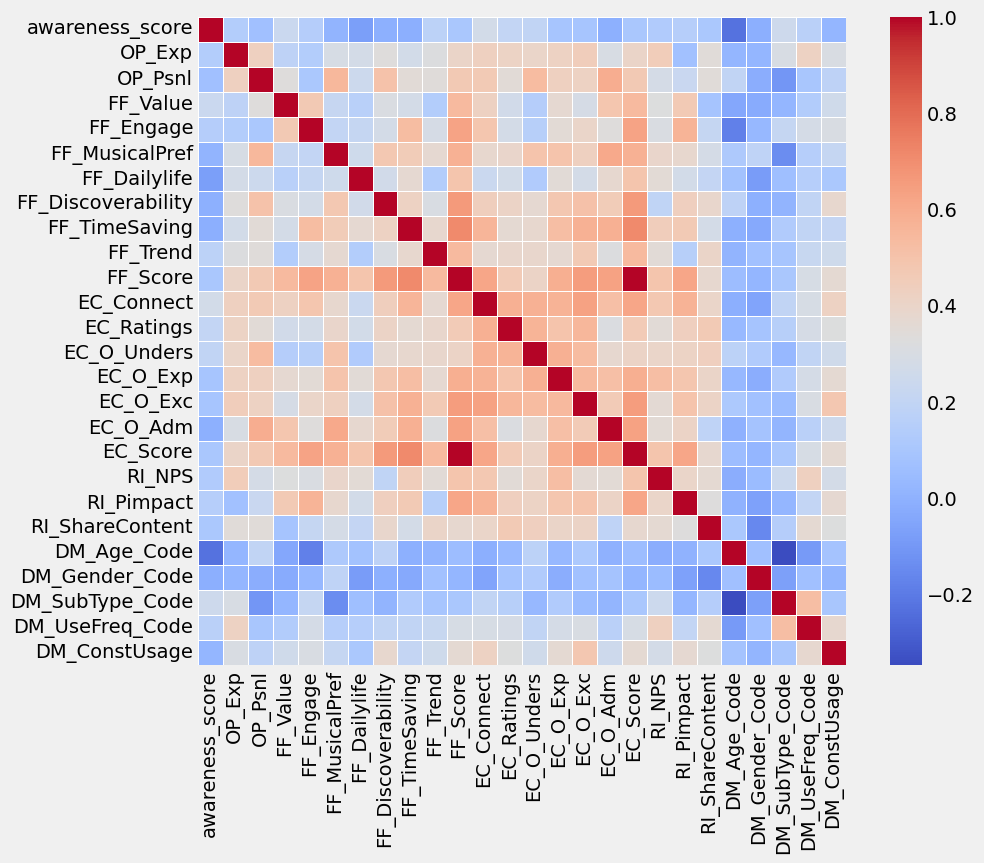

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df2 is already defined and contains the relevant columns
# Remove 'UserID' from the correlation matrix as it is non-numeric
# df2_numeric = df2.drop('uniqueIDs', axis=1)

# Compute the correlation matrix
corr_matrix = df2.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=False, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

# Show plot
plt.show()


In [ ]:
df2.describe().round(2)

,awareness_score,OP_Exp,OP_Psnl,FF_Value,FF_Engage,FF_MusicalPref,FF_Dailylife,FF_Discoverability,FF_TimeSaving,FF_Trend,...,EC_O_Adm,EC_Score,RI_NPS,RI_Pimpact,RI_ShareContent,DM_Age_Code,DM_Gender_Code,DM_SubType_Code,DM_UseFreq_Code,DM_ConstUsage
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,2.09,4.46,4.20,4.10,3.77,3.91,3.87,3.88,3.84,3.84,...,3.76,3.91,4.36,3.58,3.41,3.03,1.64,0.85,3.31,3.21
std,1.17,0.56,0.79,0.85,1.13,0.88,0.98,0.95,1.02,1.10,...,0.99,0.73,0.86,1.13,1.21,0.61,0.54,0.36,0.90,0.91
min,1.00,3.00,1.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,2.00,1.00,1.00,1.00,2.00,1.00,0.00,1.00,1.00
25%,1.00,4.00,4.00,4.00,3.00,3.00,3.00,3.00,3.00,3.00,...,3.00,3.00,4.00,3.00,2.00,3.00,1.00,1.00,3.00,3.00
50%,2.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,4.00,...,4.00,4.00,5.00,4.00,4.00,3.00,2.00,1.00,4.00,3.00
75%,3.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,4.00,4.00,5.00,4.00,4.00,3.00,2.00,1.00,4.00,4.00
max,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,5.00,...,5.00,5.00,5.00,5.00,5.00,5.00,4.00,1.00,4.00,5.00


# **Factor Analysis**

In [ ]:
!pip install factor-analyzer
from factor_analyzer import FactorAnalyzer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.5/42.5 kB 826.6 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.7/203.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 38.9 MB/s eta 0:00:00
  Created wheel for factor-analyzer: filename=factor_analyzer-0.5.0-py2.py3-none-any.whl size=42486 sha256=b109b1f68ce72363d6ebc0ef2d59993a96e12a65550ddba361c91f698b59d631
  Stored in directory: /root/.cache/pip/wheels/74/a2/6c/26fb1addf1ce6c60a8cef8397f2999f0a1e6e2fcddc8abf33e
Successfully built factor-analyzer


In [ ]:
# select columns for factor analysis
df3 = df2[['FF_Value',
'FF_Engage',
'FF_MusicalPref',
'FF_Dailylife',
'FF_Discoverability',
'FF_TimeSaving',
'FF_Trend',
'EC_Connect',
'EC_Ratings',
'EC_O_Unders',
'EC_O_Exp',
'EC_O_Exc',
'EC_O_Adm']]


In [ ]:
# Instantiate factor analysis object
fa = FactorAnalyzer(rotation='varimax')
fa.fit(df3)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

# 2 eigenvalues > 1

array([5.86001766, 1.26131033, 1.00685694, 0.83607957, 0.77604459,
       0.6202574 , 0.59844747, 0.45488458, 0.44215035, 0.33540579,
       0.32106181, 0.26599769, 0.22148581])

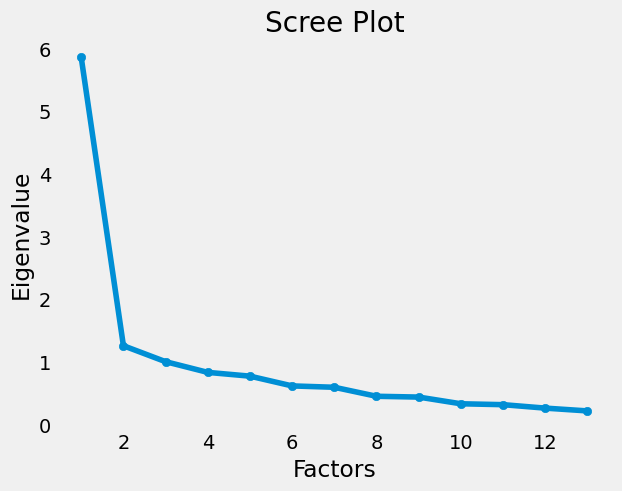

In [ ]:
# Create scree plot
plt.scatter(range(1,df3.shape[1]+1),ev)
plt.plot(range(1,df3.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(2, rotation="varimax")
fa.fit(df3)

FactorAnalyzer(n_factors=2, rotation='varimax', rotation_kwargs={})

In [ ]:
arr = fa.loadings_
arr

array([[0.11742812, 0.58927472],
       [0.15098887, 0.64191682],
       [0.55444179, 0.32705506],
       [0.20865376, 0.36148109],
       [0.47017904, 0.40079846],
       [0.42673845, 0.61643035],
       [0.47598229, 0.23867932],
       [0.59204766, 0.50456839],
       [0.65003928, 0.24267292],
       [0.85051019, 0.04135395],
       [0.61815324, 0.4369254 ],
       [0.64077498, 0.42298036],
       [0.40045299, 0.62077231]])

In [ ]:
table = pd.DataFrame(arr, columns=['F1','F2'])
table.set_index(pd.Index(df3.columns))

,F1,F2
FF_Value,0.117428,0.589275
FF_Engage,0.150989,0.641917
FF_MusicalPref,0.554442,0.327055
FF_Dailylife,0.208654,0.361481
FF_Discoverability,0.470179,0.400798
FF_TimeSaving,0.426738,0.616430
FF_Trend,0.475982,0.238679
EC_Connect,0.592048,0.504568
EC_Ratings,0.650039,0.242673
EC_O_Unders,0.850510,0.041354


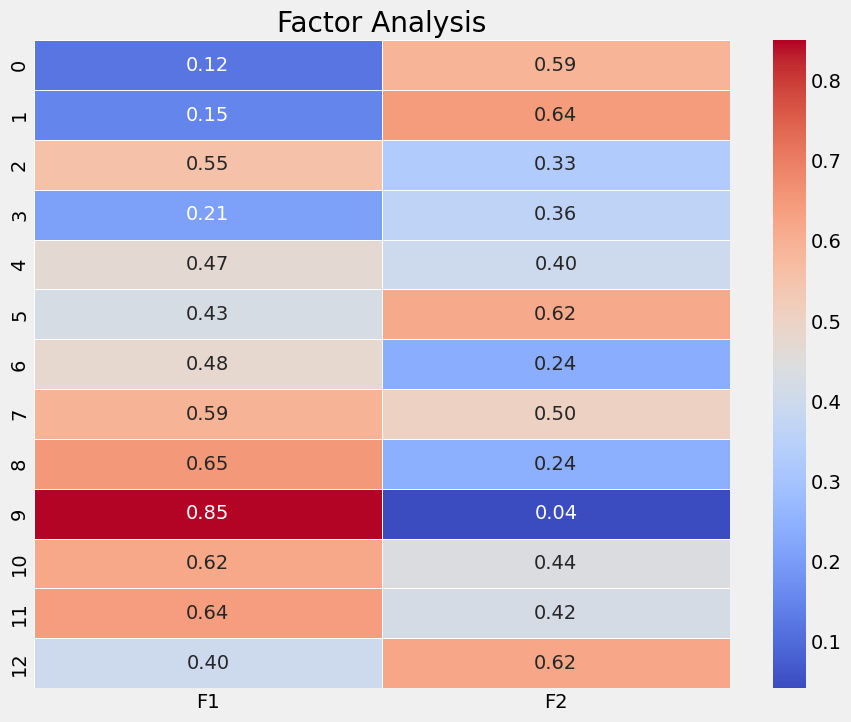

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(table, annot=True, cmap= 'coolwarm', fmt=".2f", linewidths=.5)
plt.title('Factor Analysis')
plt.show()

# F1 > Spotify emotionally connection > makes the users feel understood ＃ music-preference/discover/
# F2 > Spotify's funtionality makes the users more engaged & save time #timesaving & functionality increase the engagement


In [ ]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(3, rotation="varimax")
fa.fit(df2)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [ ]:
arr = fa.loadings_
arr

array([[ 0.04544663,  0.23757062, -0.26041743],
       [ 0.17027738,  0.6445104 , -0.0111433 ],
       [ 0.38192492,  0.4279566 ,  0.44317042],
       [ 0.58105782,  0.08318232, -0.09969313],
       [ 0.68533477,  0.09629353, -0.37698494],
       [ 0.49214909,  0.35575257,  0.39749154],
       [ 0.40689507,  0.17237067,  0.0464965 ],
       [ 0.53322878,  0.34567922,  0.24654338],
       [ 0.68590875,  0.27076316,  0.01345045],
       [ 0.33429523,  0.44041752,  0.06008786],
       [ 0.90787577,  0.31447641,  0.01944255],
       [ 0.55754332,  0.54816124, -0.04708479],
       [ 0.3319715 ,  0.60629798,  0.05801189],
       [ 0.26114421,  0.6568551 ,  0.30729348],
       [ 0.5150932 ,  0.53089074,  0.09214075],
       [ 0.53417252,  0.52851776,  0.12332144],
       [ 0.6552948 ,  0.24680652,  0.21276563],
       [ 0.90787577,  0.31447641,  0.01944255],
       [ 0.38039825,  0.49888918, -0.12240372],
       [ 0.66025332,  0.2167172 , -0.06043133],
       [ 0.20554679,  0.57614625,  0.042

In [ ]:
table = pd.DataFrame(arr, columns=['F1','F2','F3'])
table.set_index(pd.Index(df2.columns))

,F1,F2,F3
awareness_score,0.045447,0.237571,-0.260417
OP_Exp,0.170277,0.644510,-0.011143
OP_Psnl,0.381925,0.427957,0.443170
FF_Value,0.581058,0.083182,-0.099693
FF_Engage,0.685335,0.096294,-0.376985
FF_MusicalPref,0.492149,0.355753,0.397492
FF_Dailylife,0.406895,0.172371,0.046497
FF_Discoverability,0.533229,0.345679,0.246543
FF_TimeSaving,0.685909,0.270763,0.013450
FF_Trend,0.334295,0.440418,0.060088


In [ ]:

!pip install pingouin
import pingouin as pg


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=61f1e17bc6eaecaa618c3463271ccad73c606729c7793457dae5132f11fa24af
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


## reliability assessing cronbach's alpha

In [ ]:
# Functionality related factors

df_f1 = df3.loc[:,['FF_Value',
'FF_Engage',
'FF_MusicalPref',
'FF_Dailylife',
'FF_Discoverability',
'FF_TimeSaving',
'FF_Trend']]

print('factor 1',pg.cronbach_alpha(df_f1))

print('drop FF_Value',pg.cronbach_alpha(df_f1.loc[:,['FF_Engage','FF_MusicalPref','FF_Dailylife','FF_Discoverability','FF_TimeSaving','FF_Trend']]))
print('drop FF_Engage',pg.cronbach_alpha(df_f1.loc[:,['FF_Value','FF_MusicalPref','FF_Dailylife','FF_Discoverability','FF_TimeSaving','FF_Trend']]))
print('drop FF_MusicalPref',pg.cronbach_alpha(df_f1.loc[:,['FF_Value','FF_Engage','FF_Dailylife','FF_Discoverability','FF_TimeSaving','FF_Trend']]))
print('drop FF_Dailylife',pg.cronbach_alpha(df_f1.loc[:,['FF_Value','FF_Engage','FF_MusicalPref','FF_Discoverability','FF_TimeSaving','FF_Trend']]))
print('drop FF_Discoverability',pg.cronbach_alpha(df_f1.loc[:,['FF_Value','FF_Engage','FF_MusicalPref','FF_Dailylife','FF_TimeSaving','FF_Trend']]))
print('drop FF_TimeSaving',pg.cronbach_alpha(df_f1.loc[:,['FF_Value','FF_Engage','FF_MusicalPref','FF_Dailylife','FF_Discoverability','FF_Trend']]))
print('drop FF_Trend',pg.cronbach_alpha(df_f1.loc[:,['FF_Value','FF_Engage','FF_MusicalPref','FF_Dailylife','FF_Discoverability','FF_TimeSaving']]))

factor 1 (0.7572227471999751, array([0.677, 0.823]))
drop FF_Value (0.742881104525626, array([0.656, 0.814]))
drop FF_Engage (0.7206196273005249, array([0.626, 0.798]))
drop FF_MusicalPref (0.7220118811881187, array([0.628, 0.799]))
drop FF_Dailylife (0.7540637480603393, array([0.671, 0.822]))
drop FF_Discoverability (0.7181691585547274, array([0.623, 0.796]))
drop FF_TimeSaving (0.6860277556845631, array([0.58 , 0.773]))
drop FF_Trend (0.7437131357283938, array([0.657, 0.814]))


In [ ]:
# Emotional connections factors

df_f2 = df3.loc[:,['EC_Connect',
'EC_Ratings',
'EC_O_Unders',
'EC_O_Exp',
'EC_O_Exc',
'EC_O_Adm']]

print('factor 2',pg.cronbach_alpha(df_f2))

print('drop EC_Connect',pg.cronbach_alpha(df_f2.loc[:,['EC_Ratings','EC_O_Unders','EC_O_Exp','EC_O_Exc','EC_O_Adm']]))
print('drop EC_Ratings',pg.cronbach_alpha(df_f2.loc[:,['EC_Connect','EC_O_Unders','EC_O_Exp','EC_O_Exc','EC_O_Adm']]))
print('drop EC_O_Unders',pg.cronbach_alpha(df_f2.loc[:,['EC_Connect','EC_Ratings','EC_O_Exp','EC_O_Exc','EC_O_Adm']]))
print('drop EC_O_Exp',pg.cronbach_alpha(df_f2.loc[:,['EC_Connect','EC_Ratings','EC_O_Unders','EC_O_Exc','EC_O_Adm']]))
print('drop EC_O_Exc',pg.cronbach_alpha(df_f2.loc[:,['EC_Connect','EC_Ratings','EC_O_Unders','EC_O_Exp','EC_O_Adm']]))
print('drop EC_O_Adm',pg.cronbach_alpha(df_f2.loc[:,['EC_Connect','EC_Ratings','EC_O_Unders','EC_O_Exp','EC_O_Exc']]))


factor 2 (0.8682472259719488, array([0.824, 0.905]))
drop EC_Connect (0.8310706783787654, array([0.772, 0.878]))
drop EC_Ratings (0.8506365605555435, array([0.799, 0.892]))
drop EC_O_Unders (0.8445406915436893, array([0.791, 0.888]))
drop EC_O_Exp (0.8411224303125928, array([0.786, 0.886]))
drop EC_O_Exc (0.839829158824381, array([0.784, 0.885]))
drop EC_O_Adm (0.8652405952387034, array([0.818, 0.903]))


# **K-means**

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, DBSCAN

In [ ]:
# select factors for k-means
df4 = df2[['awareness_score','DM_UseFreq_Code',"FF_Value","FF_Engage","FF_TimeSaving","FF_MusicalPref","OP_Psnl","EC_O_Adm","EC_Connect","EC_Ratings","EC_O_Unders","EC_O_Exp","EC_O_Exc","RI_Pimpact"]]
df4

,awareness_score,DM_UseFreq_Code,FF_Value,FF_Engage,FF_TimeSaving,FF_MusicalPref,OP_Psnl,EC_O_Adm,EC_Connect,EC_Ratings,EC_O_Unders,EC_O_Exp,EC_O_Exc,RI_Pimpact
uniqueIDs,,,,,,,,,,,,,,
6bb2e7b6411d97b39b261bcda143c245a532b3ec5bb7a9f7df81f45b62764a1a,2,2,2,2,2,4,3,2,3,3,4,3,3,2
2b220c5d5102ed0ef58e1505f833a41d92a45e85f9e083b34562e0bc00c73aa3,1,4,4,3,5,4,5,5,3,3,4,3,3,4
32ce84a857c0cf277e22433fc068cb3b36592f40bf01b3b8584cd24cbddee44c,4,4,5,5,5,5,5,5,5,5,5,5,5,5
dad4367dd4d28574dd470a390e9c5551d20608ed4817895bf48b780c64ec04a1,3,4,5,5,5,5,5,4,4,4,4,4,4,5
f1bde138dead43e241ccdcc1dfc7b72640c11f6335af01f2db8ffa9af565fc40,2,4,4,4,4,4,5,4,4,4,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42a46fa689c121c1d6e705589d0755c5d8d2efa2deee2662ba64bcd9f8702389,3,3,4,3,4,3,3,2,2,3,3,2,4,4
025ef9e45a5aeb88906bc54fe188c98ec6cd5d0223263223760aeb291c67ce07,3,3,4,3,2,3,4,3,3,3,3,3,3,3
727ea96691c7bf7c6d63845e84f67bb0878141d9eb14c95ad1fc4f477a1eb9fe,1,2,5,1,2,4,4,4,2,2,2,5,2,4


In [ ]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df4)
    Sum_of_squared_distances.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

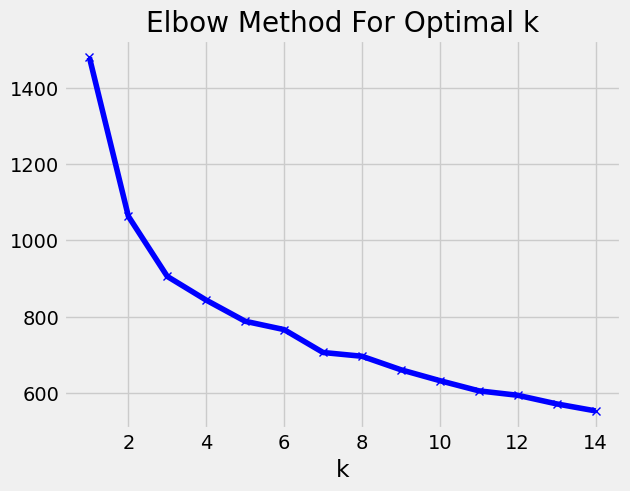

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
#plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

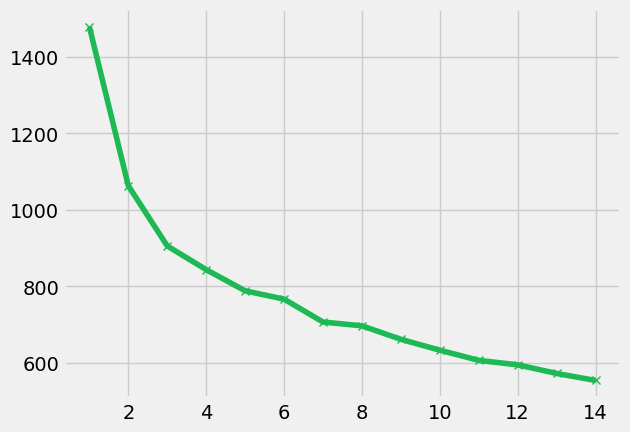

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
#plt.xlabel('k')
#plt.ylabel('Sum_of_squared_distances')

# Set the line color to #1DB954
plt.gca().get_lines()[0].set_color('#1DB954')
#plt.title('Elbow Method For Optimal k')
# Save the plot with a transparent background
plt.savefig('elbow_plot.png', transparent=True)

# Show the plot (optional)
plt.show()


K=3

In [ ]:
wcss = []
silhouette_avg = []

In [ ]:
n_clusters = 3

# Creating a KMeans instance
kmeans = KMeans(n_clusters=n_clusters)

# Fitting the model to the data
kmeans.fit(df4)

# Getting cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from collections import Counter

# Calculate the cluster counts
cluster_counts = Counter(labels)

# Calculate the total number of data points
total_data_points = len(df4)

# Calculate the percentage of data points in each cluster
cluster_percentages = {cluster: count / total_data_points * 100 for cluster, count in cluster_counts.items()}

# Print the cluster percentages
for cluster, percentage in cluster_percentages.items():
    print(f"Cluster {cluster}: {percentage:.2f}%")


Cluster 0: 26.00%
Cluster 2: 49.00%
Cluster 1: 25.00%


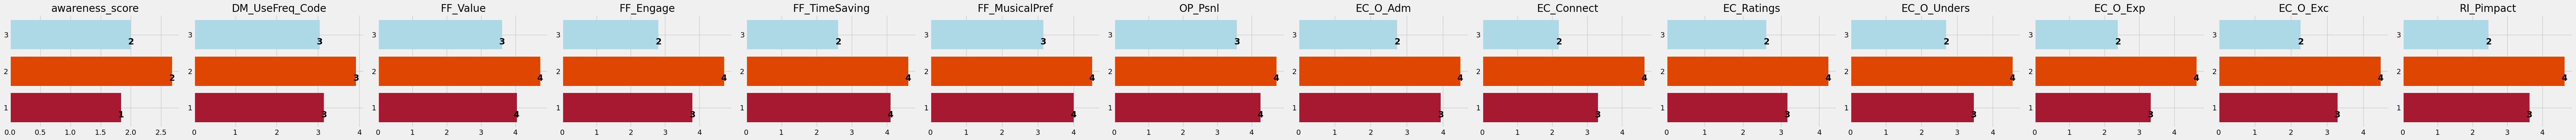

In [ ]:
plt.figure(figsize=(70, 4))

for i in range(len(cluster_centers[0,])):
  plt.subplot(1, len(cluster_centers[0,]), i+1)
  data = cluster_centers[:,i]
  cluster_number = ['1','2','3']
  plt.barh(cluster_number,data, color=['#A71930', '#DF4601','lightblue'])
  plt.title(df4.columns[i])

  for i, bar in enumerate(plt.gca().patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/4,
             '%d' % bar.get_width(), ha='center', va='center', weight='bold', size='large')



plt.tight_layout()
plt.show()

K=2

In [ ]:
n_clusters = 2

# Creating a KMeans instance
kmeans = KMeans(n_clusters=n_clusters)

# Fitting the model to the data
kmeans.fit(df4)

# Getting cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


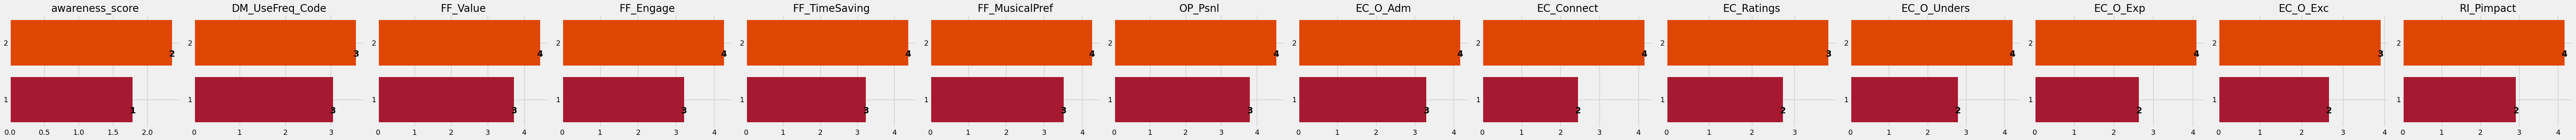

In [ ]:
plt.figure(figsize=(70, 4))

for i in range(len(cluster_centers[0,])):
  plt.subplot(1, len(cluster_centers[0,]), i+1)
  data = cluster_centers[:,i]
  cluster_number = ['1','2']
  plt.barh(cluster_number,data, color=['#A71930', '#DF4601'])
  plt.title(df4.columns[i])

  for i, bar in enumerate(plt.gca().patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/4,
             '%d' % bar.get_width(), ha='center', va='center', weight='bold', size='large')



plt.tight_layout()
plt.show()

K=4

In [ ]:
n_clusters = 4

# Creating a KMeans instance
kmeans = KMeans(n_clusters=n_clusters)

# Fitting the model to the data
kmeans.fit(df4)

# Getting cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


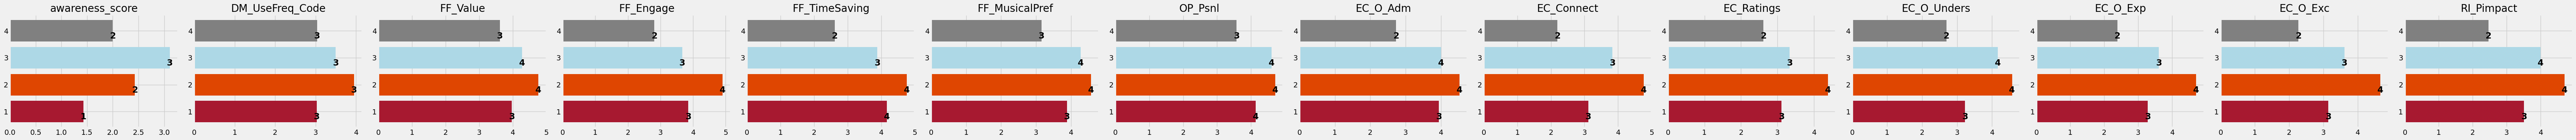

In [ ]:
plt.figure(figsize=(70, 4))

for i in range(len(cluster_centers[0,])):
  plt.subplot(1, len(cluster_centers[0,]), i+1)
  data = cluster_centers[:,i]
  cluster_number = ['1','2','3','4']
  plt.barh(cluster_number,data, color=['#A71930', '#DF4601','lightblue','grey'])
  plt.title(df4.columns[i])

  for i, bar in enumerate(plt.gca().patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/4,
             '%d' % bar.get_width(), ha='center', va='center', weight='bold', size='large')



plt.tight_layout()
plt.show()
# Cluster 1: tech savvy users - aware of personalized features and have positive perception for spotify personalization
# Cluster 2: not familiar with spotify personalized features but like enjoy the result that brought by personalization, like time saving
# Cluster 3: frequent users but not feel connected to spotify
# Cluster 4: medium familiarity with functionality and personalized features but feel emotionally connected to spotify's personalization that makes me willing to recommend to others


In [ ]:
import pandas as pd
df5 = df4.groupby(labels).size()
df5

0    35
1    21
2    18
3    26
dtype: int64

In [ ]:
! pip install squarify

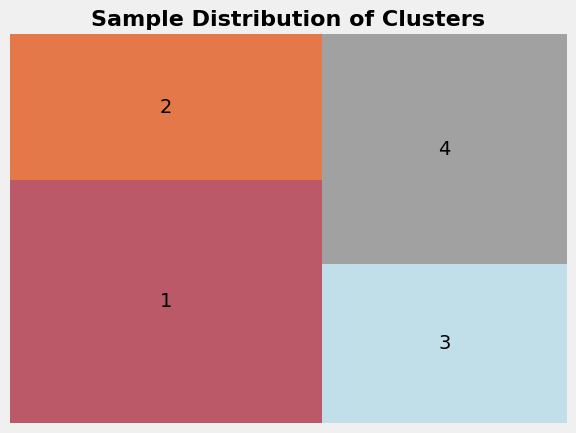

In [ ]:
import squarify
import matplotlib # needed to access cm.cmap() method

# squarify.plot(country_sales)

color_map = ['#A71930', '#DF4601','lightblue','grey']

squarify.plot(sizes = df5, label=cluster_number, color = color_map, alpha = 0.7)

plt.title("Sample Distribution of Clusters", fontsize=16, fontweight="bold")
plt.axis('off')
plt.show()

In [ ]:
# try different variable for reference
#df6 = df2[['awareness_score','DM_UseFreq_Code',"FF_Value","FF_Engage","FF_TimeSaving","FF_MusicalPref","OP_Psnl","EC_O_Adm","EC_Connect","EC_Ratings","EC_O_Unders","EC_O_Exp","EC_O_Exc","RI_ShareContent"]]
#df6

In [ ]:
#n_clusters = 4

# Creating a KMeans instance
#kmeans = KMeans(n_clusters=n_clusters)

# Fitting the model to the data
#kmeans.fit(df6)

# Getting cluster centers and labels
#cluster_centers = kmeans.cluster_centers_
#labels = kmeans.labels_

#wcss.append(kmeans.inertia_)

In [ ]:
#plt.figure(figsize=(70, 4))

#for i in range(len(cluster_centers[0,])):
  #plt.subplot(1, len(cluster_centers[0,]), i+1)
  #data = cluster_centers[:,i]
  #cluster_number = ['1','2','3','4']
  #plt.barh(cluster_number,data, color=['#A71930', '#DF4601','lightblue','grey'])
  #plt.title(df6.columns[i])

  #for i, bar in enumerate(plt.gca().patches):
    #plt.text(bar.get_width(), bar.get_y() + bar.get_height()/4,
             #'%d' % bar.get_width(), ha='center', va='center', weight='bold', size='large')


#plt.tight_layout()
#plt.show()


K=5

In [ ]:
n_clusters = 5

# Creating a KMeans instance
kmeans = KMeans(n_clusters=n_clusters)

# Fitting the model to the data
kmeans.fit(df4)

# Getting cluster centers and labels
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


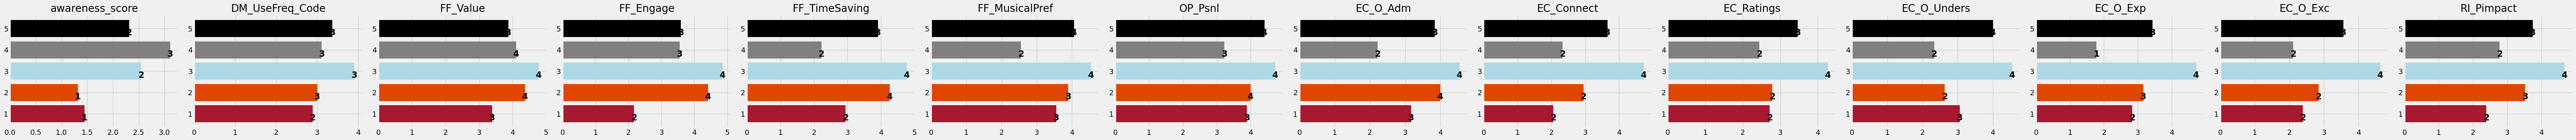

In [ ]:
plt.figure(figsize=(70, 4))

for i in range(len(cluster_centers[0,])):
  plt.subplot(1, len(cluster_centers[0,]), i+1)
  data = cluster_centers[:,i]
  cluster_number = ['1','2','3','4','5']
  plt.barh(cluster_number,data, color=['#A71930', '#DF4601','lightblue','grey','black'])
  plt.title(df4.columns[i])

  for i, bar in enumerate(plt.gca().patches):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/4,
             '%d' % bar.get_width(), ha='center', va='center', weight='bold', size='large')



plt.tight_layout()
plt.show()